In [1]:
import Library.Endsem as t1
from Library.Assign6 import powriter
from Library.Assign5 import simp
from Library.Assign4 import Fit,FitPlot
from Library.Assign3 import chelk #Importing chelosky from Assign3.py module
import math
import matplotlib.pyplot as plt
import numpy as np

Question 1:

In [2]:
A=[[0.2,-5,3,0.4,0],[-0.5,1,7,-2,0.3],[0.6,2,-4,3,0.1],[3,0.8,2,-0.4,3],[0.5,3,2,0.4,1]]
B=[[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]]

print("\nLU Decomposition:")
C=t1.LUD(A,B,3) #Precision 6



LU Decomposition:

 Solution matrix X: 

-0.736  2.511  2.423  0.959  -3.921
-0.195  0.309  0.279  0.057  -0.295
0.021  0.365  0.286  0.05  -0.29
0.273  -0.131  0.131  -0.142  0.448
0.781  -2.876  -2.679  -0.702  4.233


Question 2:

At equilibrium: 
Number of particles on left side = 2500 
Number of Particles on right side = 2500


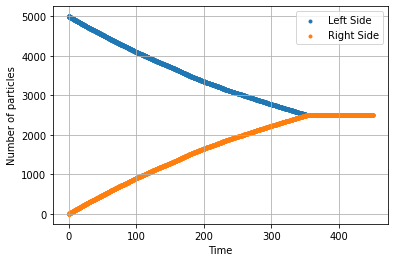

In [3]:
t1.equi(5000,450,0.1,0.1)

Question 3:

In [4]:
def f1(x):
    return 25-x*np.exp(x)

def f2(x):
    return np.exp(x)*(-1-x)

a,c=t1.NewtonR(0.5,f1,f2,1e-3) #1e-3 is the tolerance

print("The spring can be stretched up till x =",a,"m \nIterations =",c)

The spring can be stretched up till x = 2.36 m 
Iterations = 14


Question 4:

In [5]:
def fx(x):
    return 2*math.sqrt(1/9.8)/np.cos(x/2)

print("T =",t1.truncate(simp(fx,0,np.pi/2,10),2),"s")

T = 1.11 s


Question 5:

Maximum height reached is: 4.9825 units
Velocity at maximum height: 0.0006 units


Text(0, 0.5, 'velocity v')

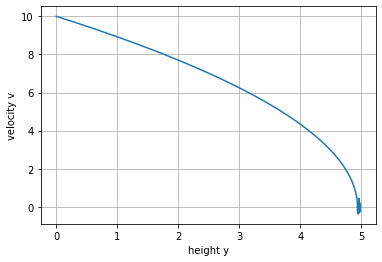

In [6]:
def f3(v,y):
    return -0.02-10/v

C,D=t1.RK4(0,10,f3,0.0001,5,0.001) #0.001 is the tolerance level for minimum velocity
plt.plot(C,D)
plt.grid()
plt.xlabel("height y")
plt.ylabel("velocity v")

Question 6:

In [7]:
A=[[1,-2,0,5],[0,7,1,5],[0,4,4,0],[0,0,0,2]]

#Guess vector
x0=[[1],[0.5],[1],[1.5]]

powriter(A,x0,1e-3)

Eigenvalue: 7.999 , Iterations:  11 

Eigenket:


[[-0.198], [0.693], [0.693], [0.0]]

Question 7:


Solution Matrix for the coefficients given in order [[a0],[a1],[a2],[a3],[a4]]: 
0.2546295072115473
-1.1937592138092263
-0.45725541238296735
-0.8025653910658191
0.013239427477396109


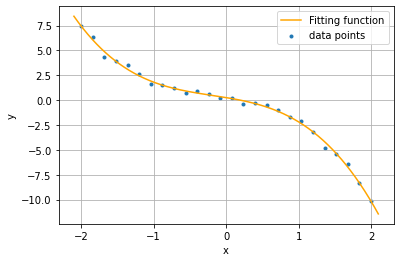

In [8]:
file= open('esem4fit.txt')
inp= file.readlines()  #Reading data from input file into array inp

A= [[float(inp[i].split(' ')[0])] for i in range(0,26)] 
B= [[float(inp[i].split(' ')[1])] for i in range(0,26)] 

#Fitting in y=a0 + a1(x) + a2(x^2) + a3(x^3)+a4(x^4)
C,D=Fit(A,B,5) #Fit function from Assign4.py module

print("Solution Matrix for the coefficients given in order [[a0],[a1],[a2],[a3],[a4]]: ")
D=chelk(C,D,25) #Chelosky decomposition to solve C,D

def my_formula(x,D): 
    k=0
    for i in range(len(D)):
        k+=D[i][0]*(x**i)
    return k  

FitPlot(A,B,-2.1,2.1,my_formula,D)